In [2]:
import pandas as pd
import seaborn as sns

# Load the dataset
df = pd.read_csv('C:/Users/Mariam Usman/Downloads/ifood_df.csv')
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

In [3]:
df

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,61223.0,0,1,46,709,43,182,42,118,247,...,0,0,0,0,1,0,0,1094,847,0
2201,64014.0,2,1,56,406,0,30,0,0,8,...,1,0,0,0,0,0,1,436,428,1
2202,56981.0,0,0,91,908,48,217,32,12,24,...,0,0,0,0,1,0,0,1217,1193,1
2203,69245.0,0,1,8,428,30,214,80,30,61,...,1,0,0,0,0,1,0,782,721,0


# DATA CLEANING

In [4]:
# check for missing values
print(df.isnull().sum())

# check for duplicates
print(df.duplicated().sum())

# drop duplicates
df.drop_duplicates(inplace=True)

# drop columns that are not needed
df = df.drop(['Z_CostContact', 'Z_Revenue'], axis=1)

# check the datatypes of the columns
print(df.dtypes)

# fix datatype issues
df['Kidhome'] = df['Kidhome'].astype('category')
df['Teenhome'] = df['Teenhome'].astype('category')

# check for outliers
# remove outliers if needed


Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpO

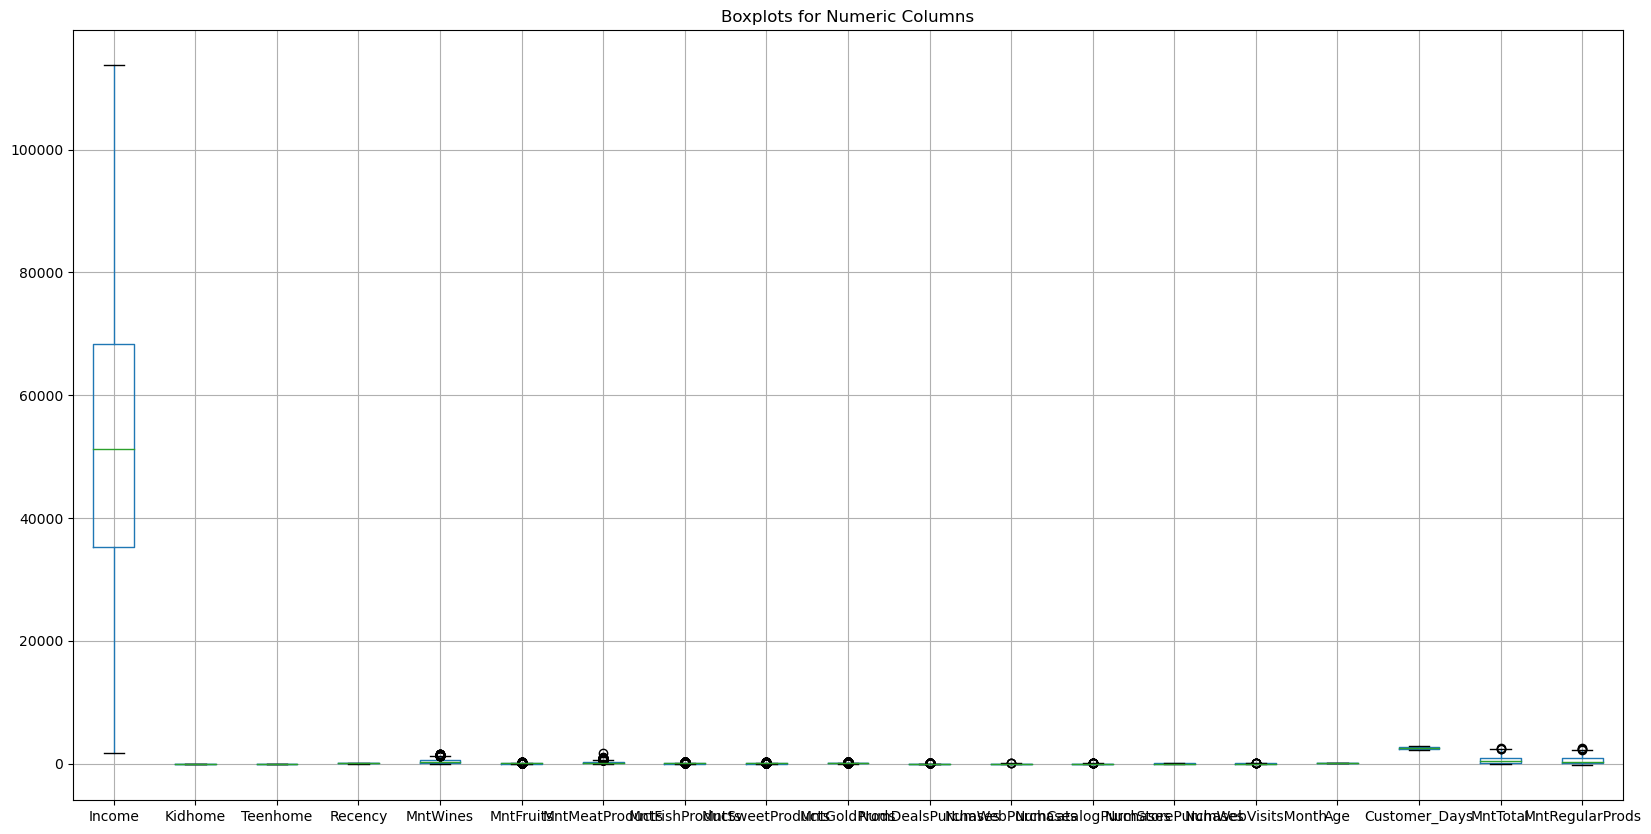

In [5]:
import matplotlib.pyplot as plt

customers = pd.read_csv('C:/Users/Mariam Usman/Downloads/ifood_df.csv')
# Create a list of columns with numerical data
num_cols = ['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 
            'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 
            'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Age', 'Customer_Days', 
            'MntTotal', 'MntRegularProds']

# Create a boxplot for each column to visualize any outliers
plt.figure(figsize=(20, 10))
customers[num_cols].boxplot()
plt.title('Boxplots for Numeric Columns')
plt.show()


In [6]:
#REMOVING OULITER USING INTERQUARTILE METHOD
# Calculate the IQR and upper and lower bounds
Q1 = np.percentile(customers['MntTotal'], 25)
Q3 = np.percentile(customers['MntTotal'], 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify the outliers
outliers = customers[(customers['MntTotal'] < lower_bound) | (customers['MntTotal'] > upper_bound)]

# Remove the outliers
outliers_removed = customers[(customers['MntTotal'] >= lower_bound) & (customers['MntTotal'] <= upper_bound)]



NameError: name 'np' is not defined

# EXPLORATORY DATA ANALYSIS

In [ ]:
# create a dictionary to map the product names to their respective columns
product_map = {
    'Wines': 'MntWines',
    'Fruits': 'MntFruits',
    'MeatProducts': 'MntMeatProducts',
    'FishProducts': 'MntFishProducts',
    'SweetProducts': 'MntSweetProducts',
    'GoldProds': 'MntGoldProds'
}

# group the dataframe by customer and sum the purchases for each product
grouped = df.groupby('Customer_Days').agg({
    product_map['Wines']: 'sum',
    product_map['Fruits']: 'sum',
    product_map['MeatProducts']: 'sum',
    product_map['FishProducts']: 'sum',
    product_map['SweetProducts']: 'sum',
    product_map['GoldProds']: 'sum'
})

# sort the dataframe by the most purchased product
grouped = grouped.sort_values(by=list(product_map.values()), ascending=False)

# print the top 3 products for each customer
for index, row in grouped.iterrows():
    top_products = row.sort_values(ascending=False)[:3]
    top_products_str = ', '.join(top_products.index)
    print(f"Customer {index} prefers: {top_products_str}")


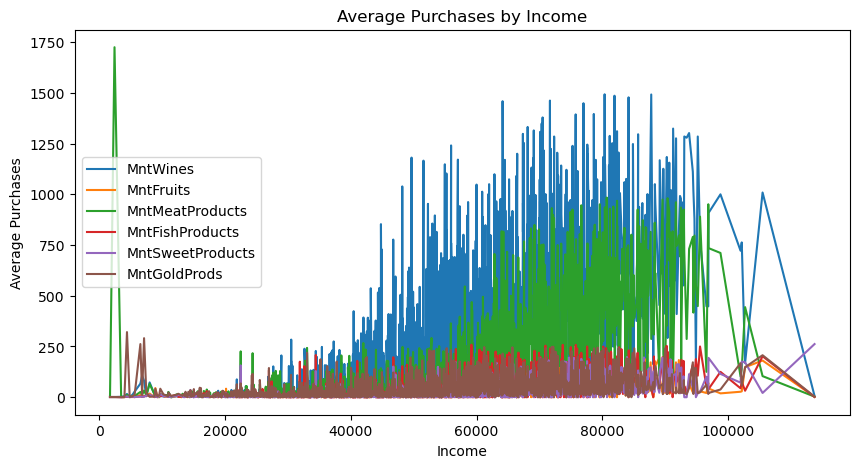

In [7]:
# Customers with higher income tend to make more purchases across all product categories:

import matplotlib.pyplot as plt

# Group customers by income and calculate the mean purchases for each product category
grouped = df.groupby('Income')[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].mean()

# Plot the results
grouped.plot(figsize=(10, 5))
plt.title('Average Purchases by Income')
plt.xlabel('Income')
plt.ylabel('Average Purchases')
plt.show()

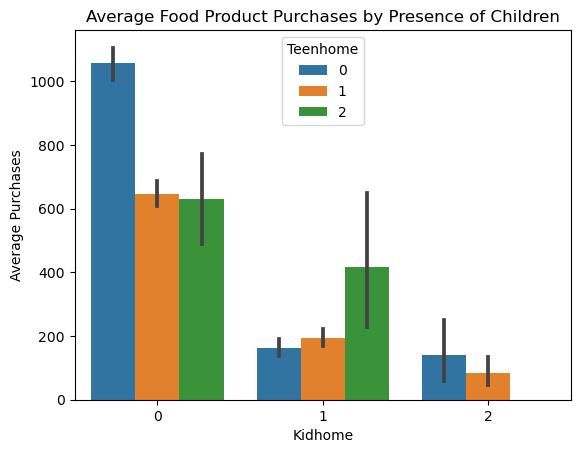

In [8]:
# Customers with children tend to purchase more food products:
import seaborn as sns
import numpy as np

# Create a barplot of average food product purchases by presence of children
sns.barplot(x='Kidhome', y='MntTotal', hue='Teenhome', data=df, estimator=np.mean)
plt.title('Average Food Product Purchases by Presence of Children')
plt.xlabel('Kidhome')
plt.ylabel('Average Purchases')
plt.show()

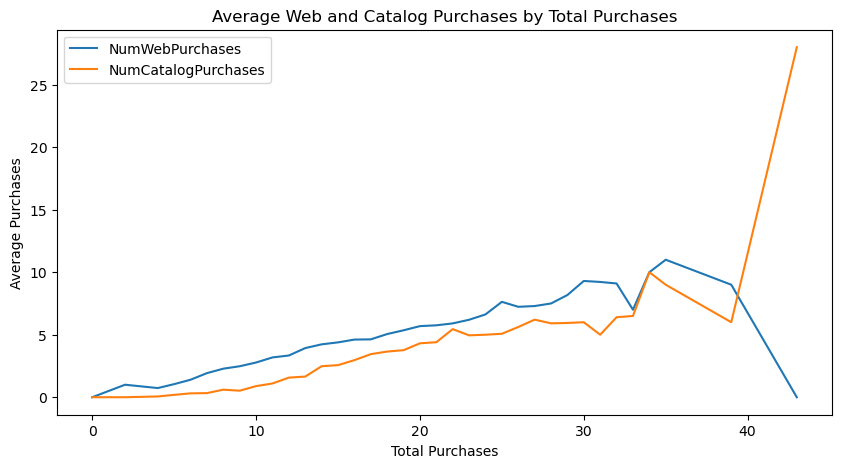

In [9]:
# Customers who have made more web and catalog purchases tend to have made more overall purchases:
# Calculate the total number of purchases for each customer
df['TotalPurchases'] = df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']

# Group customers by total purchases and calculate the mean web and catalog purchases for each group
grouped = df.groupby('TotalPurchases')[['NumWebPurchases', 'NumCatalogPurchases']].mean()

# Plot the results
grouped.plot(figsize=(10, 5))
plt.title('Average Web and Catalog Purchases by Total Purchases')
plt.xlabel('Total Purchases')
plt.ylabel('Average Purchases')
plt.show()


In [10]:
# Customers who have complained in the past are less likely to respond to marketing campaigns:
# Calculate the response rate for customers who have complained in the past
response_rate_complainers = df[df['Complain'] == 1]['Response'].mean()

# Calculate the response rate for customers who have not complained in the past
response_rate_non_complainers = df[df['Complain'] == 0]['Response'].mean()

# Print the results
print('Response rate for customers who have complained: {:.2%}'.format(response_rate_complainers))
print('Response rate for customers who have not complained: {:.2%}'.format(response_rate_non_complainers))


Response rate for customers who have complained: 15.79%
Response rate for customers who have not complained: 15.38%


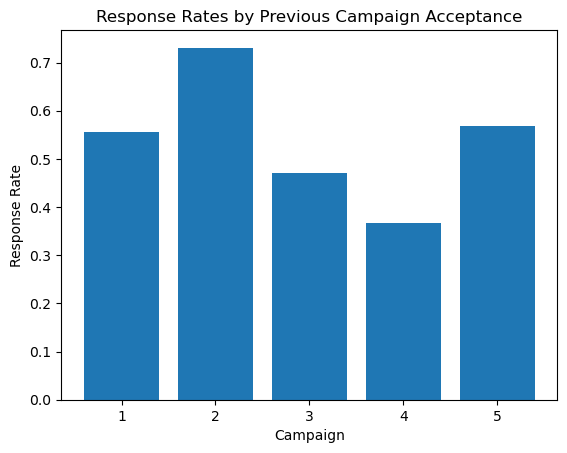

In [11]:
# Customers who have accepted previous marketing campaigns are more likely to respond to future campaigns
# Calculate the response rate for customers who have accepted each marketing campaign
response_rates = []
for i in range(1, 6):
    response_rate = df[df['AcceptedCmp{}'.format(i)] == 1]['Response'].mean()
    response_rates.append(response_rate)

# Plot the results
plt.bar(x=[1, 2, 3, 4, 5], height=response_rates)
plt.title('Response Rates by Previous Campaign Acceptance')
plt.xlabel('Campaign')
plt.ylabel('Response Rate')
plt.show()


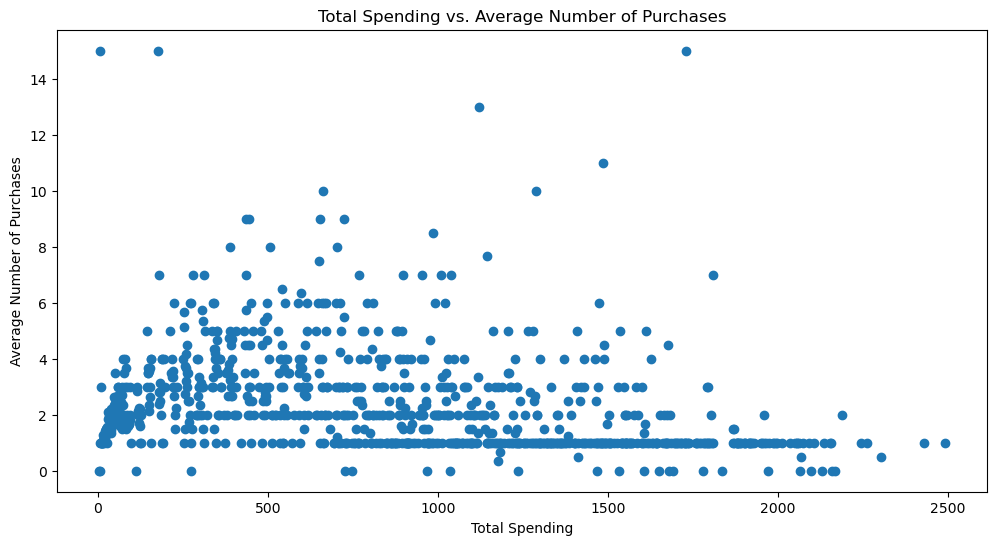

In [12]:
# Group customers by their total amount spent on all products
grouped_by_spending = customers.groupby('MntTotal')

# Calculate the average number of purchases for each spending group
avg_purchases_by_spending = grouped_by_spending['NumDealsPurchases'].mean()

# Create a scatter plot of total spending vs. average number of purchases
plt.figure(figsize=(12,6))
plt.scatter(grouped_by_spending.sum().index, avg_purchases_by_spending)
plt.title('Total Spending vs. Average Number of Purchases')
plt.xlabel('Total Spending')
plt.ylabel('Average Number of Purchases')
plt.show()


Median income: 51412.0
Mean income: 51687.2587827808


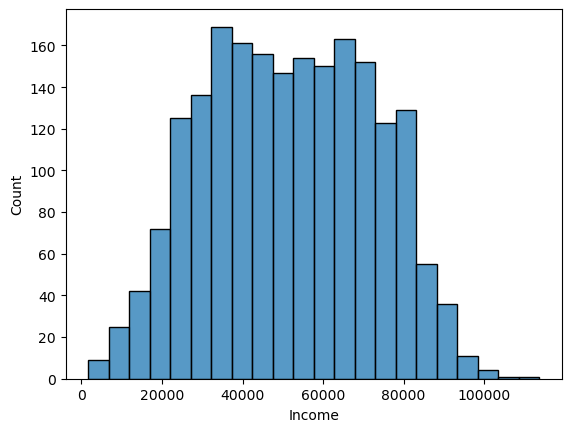

In [13]:
# Explore income distribution
sns.histplot(df['Income'])
print('Median income:', df['Income'].median())
print('Mean income:', df['Income'].mean())



<AxesSubplot:xlabel='Teenhome', ylabel='MntSweetProducts'>

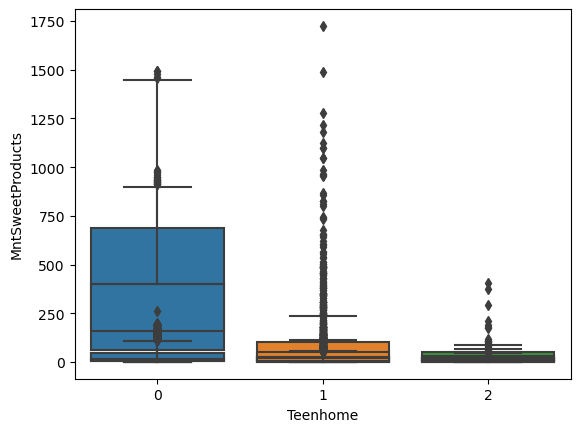

In [14]:
# Explore spending behavior based on number of kids and teenagers
sns.boxplot(x='Kidhome', y='MntWines', data=df)
sns.boxplot(x='Kidhome', y='MntMeatProducts', data=df)
sns.boxplot(x='Teenhome', y='MntFruits', data=df)
sns.boxplot(x='Teenhome', y='MntSweetProducts', data=df)



<AxesSubplot:xlabel='AcceptedCmpOverall', ylabel='MntTotal'>

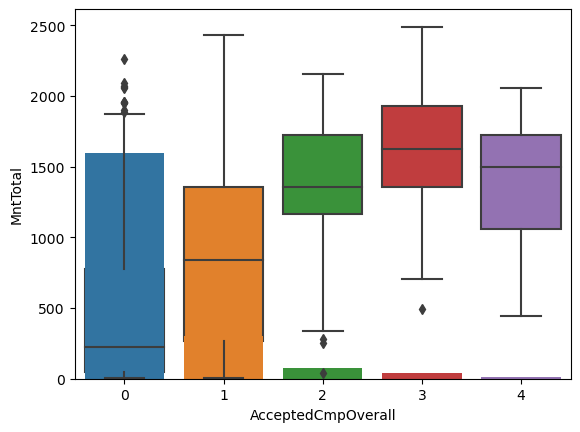

In [15]:
# Explore the impact of marketing campaigns
campaign_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
df['AcceptedCmpOverall'] = df[campaign_cols].sum(axis=1)
sns.countplot(x='AcceptedCmpOverall', data=df)
sns.boxplot(x='AcceptedCmpOverall', y='MntTotal', data=df)



In [16]:
# Create a dictionary to store the product names and their total quantity
product_totals = {'Wines': sum(customers['MntWines']),
                  'Fruits': sum(customers['MntFruits']),
                  'Meat Products': sum(customers['MntMeatProducts']),
                  'Fish Products': sum(customers['MntFishProducts']),
                  'Sweet Products': sum(customers['MntSweetProducts']),
                  'Gold Products': sum(customers['MntGoldProds'])}

# Sort the products by their total quantity in descending order
sorted_products = sorted(product_totals.items(), key=lambda x: x[1], reverse=True)

# Print the top 3 products by total quantity
print(f"The top 3 most purchased products are: {sorted_products[0][0]}, {sorted_products[1][0]}, and {sorted_products[2][0]}.")


The top 3 most purchased products are: Wines, Meat Products, and Gold Products.


In [17]:
# Group customers by their values for Kidhome and Teenhome, and calculate the mean of their Incomes
avg_income_by_kidteen = customers.groupby(['Kidhome', 'Teenhome'])['Income'].mean()

# Display the results
print(avg_income_by_kidteen)


Kidhome  Teenhome
0        0           65094.417197
         1           57834.878641
         2           57085.166667
1        0           33350.801619
         1           43738.605978
         2           53377.857143
2        0           34586.000000
         1           41824.655172
Name: Income, dtype: float64


In [18]:
# Find the most selling products
product_counts = customers.iloc[:, 10:15].sum().sort_values(ascending=False)

# Print the result
print("Most selling products:\n")
print(product_counts.head())


Most selling products:

NumStorePurchases      12841
NumWebVisitsMonth      11768
NumWebPurchases         9042
NumCatalogPurchases     5833
NumDealsPurchases       5112
dtype: int64


# ML MODELS TO IDENTIFY NEEDY AND NOT NEEDY

In [75]:
import pandas as pd
from sklearn.model_selection import train_test_split

# # Load the dataset
# df = pd.read_csv('your_dataset.csv')

# Define the criteria for needy people
needy_criteria = (
    (df['marital_Married'] == 1) & 
    (df['Kidhome'] > 0) &
    (df['MntTotal'] > df['MntTotal'].mean()) & 
    (df['Age'] > 40) &
    (df['education_Basic'] == 1)
)



# Create a new column 'is_needy' based on the criteria
df['is_needy'] = needy_criteria.astype(int)

# Split the data into train and validation sets
train_df, valid_df = train_test_split(df, test_size=0.2, random_state=42)

# Save the validation set to a new dataframe
valid_df = valid_df[['is_needy']].reset_index(drop=True)


# LOGISTIC REGRESSION

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Create a new column 'needy' in df based on the 'Income' and 'MntTotal' columns
df['needy'] = (df['Income'] < 50000) & (df['MntTotal'] < 1500)

# Define features and target variable
X = df[['marital_Married', 'Kidhome', 'MntTotal', 'Income']]
y = df['needy']

# Split data into train, test and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a logistic regression model and fit it to the training data
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

# Predict the labels of the test data
y_pred = logreg.predict(X_test)

# Compute the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.9003021148036254


# DECISON TREE

In [63]:
from sklearn.tree import DecisionTreeClassifier

# Define features and target variable
X = df[['marital_Married', 'Kidhome', 'MntTotal', 'Income']]
y = df['needy']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a decision tree model and fit it to the training data
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

# Predict the labels of the test data
y_pred = tree.predict(X_test)

# Print accuracy score
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")


Accuracy: 0.9984894259818731


# KNN

In [67]:
from sklearn.neighbors import KNeighborsClassifier

# Define features and target variable
X = df[['marital_Married', 'Kidhome', 'MntTotal', 'Income']]
y = df['needy']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a KNN model and fit it to the training data
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict the labels of the test data
y_pred = knn.predict(X_test)

# Print accuracy score
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")



Accuracy: 0.9984894259818731


C:\Users\Mariam Usman\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


# K-MEANS

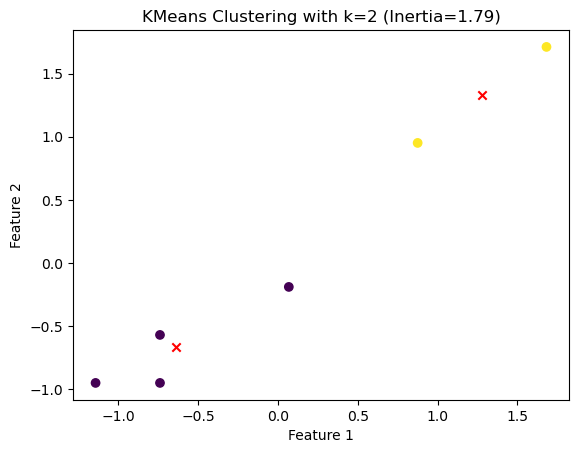

In [69]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Load data
X = np.array([[2,3], [3,3], [3,4], [5,5], [7,8], [9,10]])

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit KMeans clustering model with k=2
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)

# Compute inertia
inertia = kmeans.inertia_

# Plot clusters
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='red', marker='x')
plt.title(f'KMeans Clustering with k=2 (Inertia={inertia:.2f})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [76]:
# create validation dataframe
valid_df = df.sample(frac=0.2, random_state=42)

# define needy criteria
needy_criteria = (
    (valid_df['marital_Married'] == 1) &
    (valid_df['Kidhome'] > 0) &
    (valid_df['MntTotal'] > valid_df['MntTotal'].mean()) &
    (valid_df['Age'] > 50) &
    (valid_df['education_Basic'] == 1)
)

# create new column 'needy'
valid_df['needy'] = np.where(needy_criteria, 'yes', 'no')

# display necessary columns to identify needy and not needy
print(valid_df[['marital_Married', 'Kidhome', 'MntTotal', 'Age', 'education_Basic', 'needy']])


      marital_Married  Kidhome  MntTotal  Age  education_Basic needy
1966                0        0      2169   73                0    no
1091                0        0      1059   37                0    no
1468                0        1       595   42                0    no
438                 1        1       306   48                0    no
1790                0        0       721   38                0    no
...               ...      ...       ...  ...              ...   ...
1314                1        0       270   45                0    no
930                 0        1        30   41                0    no
1735                0        1        31   41                0    no
59                  0        0      1046   72                0    no
71                  0        0      2158   44                0    no

[441 rows x 6 columns]


In [77]:
valid_df_copy = valid_df.copy()

In [78]:
# Add "needy" and "not needy" columns to the copy dataframe
valid_df_copy['needy'] = (
    (valid_df_copy['marital_Married'] == 1) & 
    (valid_df_copy['Kidhome'] > 0) &
    (valid_df_copy['MntTotal'] > df['MntTotal'].mean()) & 
    (valid_df_copy['Age'] > 50) &
    (valid_df_copy['education_Basic'] == 1)
).astype(int)

valid_df_copy['not needy'] = 1 - valid_df_copy['needy']

# Display the updated validation dataframe
valid_df_copy.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,is_needy,needy,cluster,not needy
1966,91712.0,0,0,47,1276,24,746,94,29,48,...,0,1,0,2169,2121,1,0,0,0,1
1091,81698.0,0,0,1,709,45,115,30,160,45,...,0,0,0,1059,1014,1,0,0,0,1
1468,57867.0,1,0,48,344,35,178,15,23,17,...,1,0,0,595,578,0,0,0,1,1
438,38988.0,1,2,90,164,24,103,12,3,42,...,1,0,0,306,264,0,0,0,1,1
1790,58582.0,0,1,15,402,35,106,101,77,42,...,0,0,0,721,679,1,0,0,0,1


In [79]:
needy_counts = valid_df_copy['not needy'].count()
print(needy_counts)

441


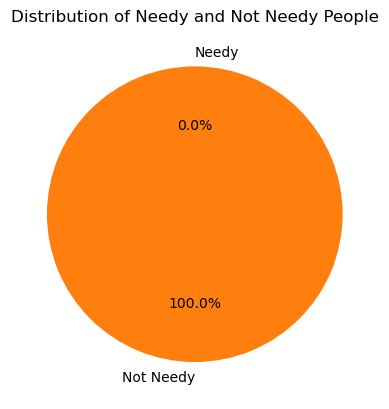

In [80]:
import matplotlib.pyplot as plt

# Count the number of needy and not needy people in validation_df_copy
needy_count = valid_df_copy['needy'].sum()
not_needy_count = len(valid_df_copy) - needy_count

# Create a list of labels and values for the pie chart
labels = ['Needy', 'Not Needy']
values = [needy_count, not_needy_count]

# Create the pie chart
fig, ax = plt.subplots()
ax.pie(values, labels=labels, autopct='%1.1f%%', startangle=90)

# Add a title to the chart
ax.set_title('Distribution of Needy and Not Needy People')

# Show the chart
plt.show()


In [1]:
import pandas as pd

# create a sample dataframe
data = {'marital_Married': [1, 0, 1, 1, 0],
        'Kidhome': [1, 0, 0, 2, 1],
        'MntTotal': [1281, 160, 87, 962, 78],
        'Age': [50, 55, 47, 25, 32],
        'education_Basic': [1, 0, 1, 1, 0]}
df = pd.DataFrame(data)

# find the maximum and minimum values
max_values = df[['marital_Married', 'Kidhome', 'MntTotal', 'Age', 'education_Basic']].max()
min_values = df[['marital_Married', 'Kidhome', 'MntTotal', 'Age', 'education_Basic']].min()

print("Maximum values:\n", max_values)
print("\nMinimum values:\n", min_values)


Maximum values:
 marital_Married       1
Kidhome               2
MntTotal           1281
Age                  55
education_Basic       1
dtype: int64

Minimum values:
 marital_Married     0
Kidhome             0
MntTotal           78
Age                25
education_Basic     0
dtype: int64


In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler


# Create a new column 'needy' based on the given conditions
df['needy'] = df.apply(lambda row: 'needy' if (row['Kidhome'] > 0 or row['MntTotal'] < 500) else 'not needy', axis=1)

# Define features and target variable
X = df[['marital_Married', 'Kidhome', 'MntTotal', 'Income']]
y = df['needy']

# Split data into train, test and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a logistic regression model and fit it to the training data
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_scaled, y_train)

# Predict the labels of the test data
y_pred = logreg.predict(X_test_scaled)

# Evaluate the accuracy of the model
accuracy = logreg.score(X_test_scaled, y_test)
print("Accuracy:", accuracy)


Accuracy: 0.9827160493827161


In [26]:
df

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,TotalPurchases,needy
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,1,0,0,1529,1441,0,25,not needy
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,1,0,0,21,15,0,6,needy
2,71613.0,0,0,26,426,49,127,111,21,42,...,0,0,1,0,0,734,692,0,21,not needy
3,26646.0,1,0,26,11,4,20,10,3,5,...,0,0,1,0,0,48,43,0,8,needy
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,1,407,392,0,19,needy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2198,26816.0,0,0,50,5,1,6,3,4,3,...,0,0,1,0,0,19,16,0,4,needy
2200,61223.0,0,1,46,709,43,182,42,118,247,...,0,0,1,0,0,1094,847,0,18,not needy
2202,56981.0,0,0,91,908,48,217,32,12,24,...,0,0,1,0,0,1217,1193,1,19,not needy
2203,69245.0,0,1,8,428,30,214,80,30,61,...,0,0,0,1,0,782,721,0,23,not needy


In [25]:
# Create a new dataframe for test data
test_df = df[['marital_Married', 'Kidhome', 'MntTotal', 'Income']].copy()

# Scale features
X_test_scaled = scaler.transform(df)

# Predict the labels of the test data
test_pred = logreg.predict(X_test_scaled)

# Create a new dataframe with the predictions
predictions = pd.DataFrame({
    'marital_Married': df['marital_Married'],
    'Kidhome': df['Kidhome'],
    'MntTotal': df['MntTotal'],
    'Income': df['Income'],
    'needy': test_pred
})

# Print the dataframe
print(predictions)


C:\Users\Mariam Usman\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- AcceptedCmp1
- AcceptedCmp2
- AcceptedCmp3
- AcceptedCmp4
- AcceptedCmp5
- ...
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


ValueError: could not convert string to float: 'not needy'